In [1]:
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

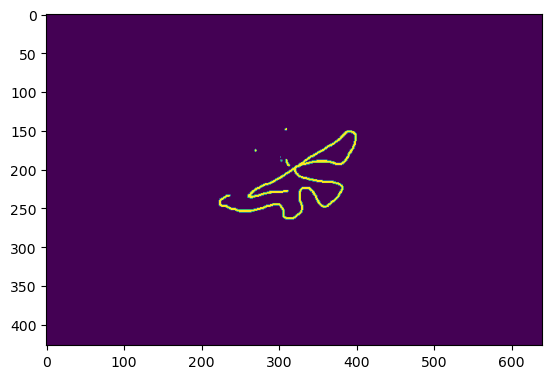

In [2]:
from utils.data_utils import ImageDataset, create_dataloaders

data = ImageDataset(r"data/bf.png", r"data/bf_fore.png", r"data/bf_back.png")
train_loader, test_loader = create_dataloaders(data)

plt.imshow(data.mask_fore)
plt.show()

In [4]:
from utils.training_utils import TrainingCenter
from torch.optim import AdamW
from models import Network

net = Network(5, 1)
optimizer = AdamW(net.parameters(), 0.01)
tc = TrainingCenter(net, optimizer, model_name="plain")
tc.train(50, train_loader, test_loader)

Starting training from epoch: 0


100%|██████████| 37332/37332 [00:05<00:00, 6936.29it/s, loss=0.0202]


Epoch 1 | Time 6.8 | Train Loss 0.02023 | Test Loss 0.00826 | Test Acc 1


100%|██████████| 37332/37332 [00:06<00:00, 5938.96it/s, loss=0.00332]


Epoch 2 | Time 8.14 | Train Loss 0.003323 | Test Loss 0.00662 | Test Acc 1


100%|██████████| 37332/37332 [00:07<00:00, 5079.42it/s, loss=0.00463]


Epoch 3 | Time 9.22 | Train Loss 0.004625 | Test Loss 0.0043 | Test Acc 1


100%|██████████| 37332/37332 [00:06<00:00, 5933.30it/s, loss=0.00283]


Epoch 4 | Time 7.99 | Train Loss 0.002833 | Test Loss 0.00378 | Test Acc 1


100%|██████████| 37332/37332 [00:05<00:00, 6683.42it/s, loss=0.00352]


Epoch 5 | Time 7.63 | Train Loss 0.003523 | Test Loss 0.00351 | Test Acc 1


100%|██████████| 37332/37332 [00:08<00:00, 4495.87it/s, loss=0.00178]


Epoch 6 | Time 10.3 | Train Loss 0.001777 | Test Loss 0.0053 | Test Acc 1


100%|██████████| 37332/37332 [00:07<00:00, 5183.67it/s, loss=0.00345]


Epoch 7 | Time 9.05 | Train Loss 0.00345 | Test Loss 0.00646 | Test Acc 1


100%|██████████| 37332/37332 [00:06<00:00, 5830.97it/s, loss=0.00341]


Epoch 8 | Time 8.52 | Train Loss 0.00341 | Test Loss 0.00485 | Test Acc 1


100%|██████████| 37332/37332 [00:06<00:00, 5799.64it/s, loss=0.00224]


Epoch 9 | Time 8.27 | Train Loss 0.002239 | Test Loss 0.00765 | Test Acc 1


100%|██████████| 37332/37332 [00:06<00:00, 5859.58it/s, loss=0.00354]


Epoch 10 | Time 8.35 | Train Loss 0.003539 | Test Loss 0.0103 | Test Acc 1


100%|██████████| 37332/37332 [00:05<00:00, 6427.28it/s, loss=0.0037] 


Epoch 11 | Time 7.44 | Train Loss 0.003698 | Test Loss 0.0416 | Test Acc 1


100%|██████████| 37332/37332 [00:08<00:00, 4581.51it/s, loss=0.00253]


Epoch 12 | Time 10.1 | Train Loss 0.002529 | Test Loss 0.00523 | Test Acc 1


100%|██████████| 37332/37332 [00:07<00:00, 4940.23it/s, loss=0.00196] 


Epoch 13 | Time 9.56 | Train Loss 0.001961 | Test Loss 0.0045 | Test Acc 1


100%|██████████| 37332/37332 [00:07<00:00, 5178.71it/s, loss=0.00286]


Epoch 14 | Time 9.07 | Train Loss 0.002855 | Test Loss 0.00308 | Test Acc 1


100%|██████████| 37332/37332 [00:08<00:00, 4247.55it/s, loss=0.00314]


Epoch 15 | Time 10.8 | Train Loss 0.003139 | Test Loss 0.00391 | Test Acc 1


100%|██████████| 37332/37332 [00:05<00:00, 6393.55it/s, loss=0.00256] 


Epoch 16 | Time 7.31 | Train Loss 0.002559 | Test Loss 0.00402 | Test Acc 1


100%|██████████| 37332/37332 [00:05<00:00, 6338.70it/s, loss=0.00317]


Epoch 17 | Time 7.25 | Train Loss 0.003172 | Test Loss 0.00537 | Test Acc 1


100%|██████████| 37332/37332 [00:05<00:00, 6610.89it/s, loss=0.00338]


Epoch 18 | Time 7.1 | Train Loss 0.003375 | Test Loss 0.00482 | Test Acc 1


100%|██████████| 37332/37332 [00:06<00:00, 5879.64it/s, loss=0.00388]


Epoch 19 | Time 8.11 | Train Loss 0.003875 | Test Loss 0.00279 | Test Acc 1


100%|██████████| 37332/37332 [00:06<00:00, 6074.03it/s, loss=0.0027] 


Epoch 20 | Time 7.76 | Train Loss 0.002697 | Test Loss 0.00733 | Test Acc 1


100%|██████████| 37332/37332 [00:06<00:00, 6183.47it/s, loss=0.00245]


Epoch 21 | Time 7.44 | Train Loss 0.002449 | Test Loss 0.00408 | Test Acc 1


100%|██████████| 37332/37332 [00:06<00:00, 6209.59it/s, loss=0.00288]


Epoch 22 | Time 7.56 | Train Loss 0.002885 | Test Loss 0.00308 | Test Acc 1


100%|██████████| 37332/37332 [00:06<00:00, 5929.88it/s, loss=0.00323]


Epoch 23 | Time 7.82 | Train Loss 0.00323 | Test Loss 0.0223 | Test Acc 1


100%|██████████| 37332/37332 [00:05<00:00, 6391.39it/s, loss=0.00285]


Epoch 24 | Time 7.25 | Train Loss 0.002852 | Test Loss 0.00353 | Test Acc 1


100%|██████████| 37332/37332 [00:05<00:00, 6420.24it/s, loss=0.00286]


Epoch 25 | Time 7.27 | Train Loss 0.002861 | Test Loss 0.00313 | Test Acc 1


100%|██████████| 37332/37332 [00:05<00:00, 6463.80it/s, loss=0.00215]


Epoch 26 | Time 7.14 | Train Loss 0.002151 | Test Loss 0.0109 | Test Acc 1


100%|██████████| 37332/37332 [00:05<00:00, 6318.11it/s, loss=0.00301]


Epoch 27 | Time 7.57 | Train Loss 0.003014 | Test Loss 0.00564 | Test Acc 1


100%|██████████| 37332/37332 [00:06<00:00, 5926.55it/s, loss=0.00306]


Epoch 28 | Time 7.71 | Train Loss 0.003062 | Test Loss 0.00402 | Test Acc 1


100%|██████████| 37332/37332 [00:05<00:00, 6476.96it/s, loss=0.003]  


Epoch 29 | Time 7.13 | Train Loss 0.002997 | Test Loss 0.00595 | Test Acc 1


100%|██████████| 37332/37332 [00:05<00:00, 6576.20it/s, loss=0.0022] 


Epoch 30 | Time 7.01 | Train Loss 0.002203 | Test Loss 0.00406 | Test Acc 1


100%|██████████| 37332/37332 [00:05<00:00, 6438.78it/s, loss=0.00255]


Epoch 31 | Time 7.16 | Train Loss 0.002554 | Test Loss 0.00807 | Test Acc 1


100%|██████████| 37332/37332 [00:05<00:00, 6498.02it/s, loss=0.0036] 


Epoch 32 | Time 7.19 | Train Loss 0.003595 | Test Loss 0.00671 | Test Acc 1


100%|██████████| 37332/37332 [00:08<00:00, 4482.50it/s, loss=0.00203]


Epoch 33 | Time 10.4 | Train Loss 0.002031 | Test Loss 0.00564 | Test Acc 1


100%|██████████| 37332/37332 [00:07<00:00, 4842.56it/s, loss=0.00283]


Epoch 34 | Time 9.64 | Train Loss 0.002826 | Test Loss 0.00505 | Test Acc 1


100%|██████████| 37332/37332 [00:07<00:00, 4823.46it/s, loss=0.0028] 


Epoch 35 | Time 9.36 | Train Loss 0.002797 | Test Loss 0.0102 | Test Acc 1


100%|██████████| 37332/37332 [00:06<00:00, 5400.70it/s, loss=0.00212]


Epoch 36 | Time 8.57 | Train Loss 0.00212 | Test Loss 0.00567 | Test Acc 1


100%|██████████| 37332/37332 [00:07<00:00, 5198.53it/s, loss=0.00295]


Epoch 37 | Time 8.81 | Train Loss 0.002955 | Test Loss 0.00268 | Test Acc 1


100%|██████████| 37332/37332 [00:07<00:00, 5293.28it/s, loss=0.00242] 


Epoch 38 | Time 8.66 | Train Loss 0.002419 | Test Loss 0.00298 | Test Acc 1


100%|██████████| 37332/37332 [00:07<00:00, 4715.14it/s, loss=0.00207]


Epoch 39 | Time 9.74 | Train Loss 0.002068 | Test Loss 0.00619 | Test Acc 1


100%|██████████| 37332/37332 [00:07<00:00, 4840.80it/s, loss=0.00267]


Epoch 40 | Time 10.8 | Train Loss 0.002671 | Test Loss 0.00963 | Test Acc 1


100%|██████████| 37332/37332 [00:08<00:00, 4504.01it/s, loss=0.00284]


Epoch 41 | Time 10.2 | Train Loss 0.00284 | Test Loss 0.00414 | Test Acc 1


100%|██████████| 37332/37332 [00:07<00:00, 5299.82it/s, loss=0.00266] 


Epoch 42 | Time 8.99 | Train Loss 0.002661 | Test Loss 0.00366 | Test Acc 1


100%|██████████| 37332/37332 [00:08<00:00, 4199.29it/s, loss=0.00291]


Epoch 43 | Time 10.4 | Train Loss 0.002905 | Test Loss 0.00431 | Test Acc 1


100%|██████████| 37332/37332 [00:06<00:00, 5680.87it/s, loss=0.00259] 


Epoch 44 | Time 8.18 | Train Loss 0.002592 | Test Loss 0.0083 | Test Acc 1


100%|██████████| 37332/37332 [00:08<00:00, 4315.31it/s, loss=0.00303]


Epoch 45 | Time 11.2 | Train Loss 0.003034 | Test Loss 0.00421 | Test Acc 1


100%|██████████| 37332/37332 [00:07<00:00, 5162.66it/s, loss=0.00185]


Epoch 46 | Time 8.93 | Train Loss 0.001853 | Test Loss 0.00312 | Test Acc 1


100%|██████████| 37332/37332 [00:07<00:00, 5068.20it/s, loss=0.0025] 


Epoch 47 | Time 9.14 | Train Loss 0.002501 | Test Loss 0.00519 | Test Acc 1


100%|██████████| 37332/37332 [00:07<00:00, 5097.99it/s, loss=0.00281]


Epoch 48 | Time 9.01 | Train Loss 0.00281 | Test Loss 0.00727 | Test Acc 1


100%|██████████| 37332/37332 [00:07<00:00, 4962.53it/s, loss=0.00236] 


Epoch 49 | Time 9.32 | Train Loss 0.002356 | Test Loss 0.0073 | Test Acc 1


100%|██████████| 37332/37332 [00:07<00:00, 4941.31it/s, loss=0.00234] 


Epoch 50 | Time 9.31 | Train Loss 0.002344 | Test Loss 0.00419 | Test Acc 1
The training is finished successfully! The model is saved to {self.checkpoint_manager.save_folder}


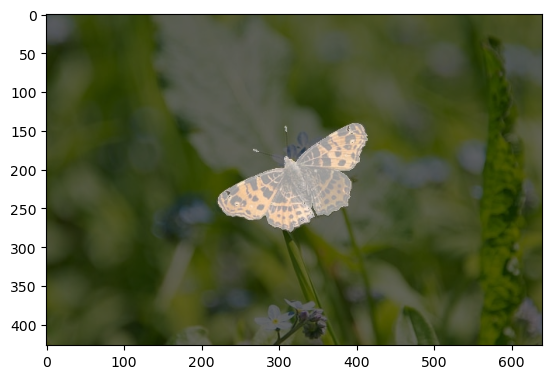

In [6]:
image, predictions = tc.inference(r"data/bf.png")

plt.imshow(image)
plt.imshow(predictions, cmap='Greys', alpha=0.6)
plt.show()

In [22]:
import torch
targets = torch.tensor(predictions.reshape((predictions.size, 1)))

from models import RealNVP
network = RealNVP(in_channels=2, mid_channels=32)
tc = TrainingCenter(network, None, snapshots_folder=r"C:\Users\mrsto\Desktop\.snapshots", model_name="real_nvp", resume_mode="best")

data = ImageDataset(r"data/bf.png", r"data/bf.png", r"data/bf.png", ignore_rgb=True)

data.data = tc.model(torch.tensor(data.data))[0]
data.labels = targets

train_loader, test_loader = create_dataloaders(data)

Model restored from epoch 50. Loss: 7.295


In [23]:
net = Network(2, 1, convex=True)
optimizer = AdamW(net.parameters(), 0.001)

tc = TrainingCenter(net, optimizer, model_name="convex")

tc.train(50, train_loader, test_loader)

Starting training from epoch: 0


  0%|          | 0/245952 [00:00<?, ?it/s]


IndexError: index 225618 is out of bounds for dimension 0 with size 12

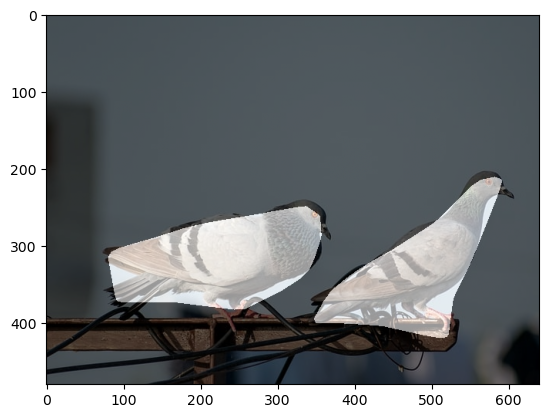

In [8]:
image, predictions = tc.inference(r"data/bf.png")

plt.imshow(image)
plt.imshow(predictions, cmap='Greys', alpha=0.6)
plt.show()